In [1]:
import pandas as pd

In [2]:
members = pd.read_csv("D:/DEPI Graduation Project/customer-retention-datathon-riyadh-edition(2)/members.csv")


C:\Users\HP\AppData\Local\Temp\ipykernel_13944\1897516780.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  members = pd.read_csv("D:/DEPI Graduation Project/customer-retention-datathon-riyadh-edition(2)/members.csv")


In [3]:
print(members['gender'].isna().mean() * 100)


65.43352783887313


In [4]:
members.isna().sum()

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

In [5]:
members['gender'] = members['gender'].fillna('other')
members.isna().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
dtype: int64

In [6]:
print(members['gender'].value_counts(dropna=False))


gender
other     4429505
male      1195355
female    1144613
Name: count, dtype: int64


In [7]:
# Count of users with age < 13
under_13_count = (members['bd'] < 13).sum()

# Count of users with age > 99
over_99_count = (members['bd'] > 99).sum()

# Total outliers
total_outliers = under_13_count + over_99_count

# Print results
print(f"Users with age under 13: {under_13_count}")
print(f"Users with age over 99: {over_99_count}")
print(f"Total age outliers: {total_outliers}")


Users with age under 13: 4541790
Users with age over 99: 5520
Total age outliers: 4547310


In [8]:
# Step 1: Convert to numeric if needed
members['bd'] = pd.to_numeric(members['bd'], errors='coerce')

# Step 2: Calculate median of valid ages (13–99 only)
valid_ages = members[(members['bd'] >= 13) & (members['bd'] <= 99)]['bd']
median_age = valid_ages.median()

# Step 3: Replace outliers and missing values with median
members['bd'] = members['bd'].apply(lambda x: median_age if pd.isna(x) or x < 13 or x > 99 else x)


In [9]:
# Count of users with age < 13
under_13_count = (members['bd'] < 13).sum()

# Count of users with age > 99
over_99_count = (members['bd'] > 99).sum()

# Total outliers
total_outliers = under_13_count + over_99_count

# Print results
print(f"Users with age under 13: {under_13_count}")
print(f"Users with age over 99: {over_99_count}")
print(f"Total age outliers: {total_outliers}")


Users with age under 13: 0
Users with age over 99: 0
Total age outliers: 0


In [10]:
members.to_csv("D:/DEPI Graduation Project/customer-retention-datathon-riyadh-edition(2)/members_cleaned.csv", index=False)


In [11]:
import pandas as pd

# Load base data
train_data = pd.read_csv('D:/DEPI Graduation Project/customer-retention-datathon-riyadh-edition(2)/train_data.csv')
members = pd.read_csv('D:/DEPI Graduation Project/customer-retention-datathon-riyadh-edition(2)/members_cleaned.csv', low_memory=False)
user_logs = pd.read_csv('D:/DEPI Graduation Project/customer-retention-datathon-riyadh-edition(2)/user_logs.csv')
transactions = pd.read_csv('D:/DEPI Graduation Project/customer-retention-datathon-riyadh-edition(2)/transactions.csv')



In [12]:
# Step 1: Aggregate user_logs (per user)
logs_agg = user_logs.groupby('msno').agg({
    'num_25': 'sum',
    'num_50': 'sum',
    'num_75': 'sum',
    'num_985': 'sum',
    'num_100': 'sum',
    'num_unq': 'mean',        # Unique songs per day avg
    'total_secs': 'mean',     # Avg listening time per day
    'date': 'nunique'         # Active days
}).reset_index().rename(columns={'date': 'active_days'})

In [13]:
# Step 2: Get latest transaction per user
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], format='%Y%m%d')
transactions['membership_expire_date'] = pd.to_datetime(transactions['membership_expire_date'], format='%Y%m%d')

trans_latest = transactions.sort_values('transaction_date').groupby('msno').tail(1)  # last transaction


In [14]:
# Step 3: Merge all
train_df = train_data \
    .merge(members, on='msno', how='left') \
    .merge(logs_agg, on='msno', how='left') \
    .merge(trans_latest, on='msno', how='left')

# Final size
print(train_df.shape)

# Save clean version
train_df.to_csv('D:/DEPI Graduation Project/Final train_df_cleaned.csv', index=False)

(946686, 23)


In [15]:
train_df.isna().sum()

msno                           0
is_churn                       0
city                      107153
bd                        107153
gender                    107153
registered_via            107153
registration_init_time    107153
num_25                    210938
num_50                    210938
num_75                    210938
num_985                   210938
num_100                   210938
num_unq                   210938
total_secs                210938
active_days               210938
payment_method_id          36452
payment_plan_days          36452
plan_list_price            36452
actual_amount_paid         36452
is_auto_renew              36452
transaction_date           36452
membership_expire_date     36452
is_cancel                  36452
dtype: int64

In [16]:
train_data['msno'].nunique()


946686

In [17]:
print(train_data['msno'].count())

946686


In [18]:
train_data = pd.read_csv('D:/DEPI Graduation Project/customer-retention-datathon-riyadh-edition(2)/train_data.csv')
print("Original train_data users:", train_data['msno'].nunique())

# Compare to merged set
print("Final merged df users:", train_df['msno'].nunique())


Original train_data users: 946686
Final merged df users: 946686


In [19]:
train_df.isna().sum()

msno                           0
is_churn                       0
city                      107153
bd                        107153
gender                    107153
registered_via            107153
registration_init_time    107153
num_25                    210938
num_50                    210938
num_75                    210938
num_985                   210938
num_100                   210938
num_unq                   210938
total_secs                210938
active_days               210938
payment_method_id          36452
payment_plan_days          36452
plan_list_price            36452
actual_amount_paid         36452
is_auto_renew              36452
transaction_date           36452
membership_expire_date     36452
is_cancel                  36452
dtype: int64

In [20]:
print(train_df['gender'].value_counts(dropna=False))


gender
other     460298
male      199439
female    179796
NaN       107153
Name: count, dtype: int64


In [21]:
missing_gender_ratio = train_df['gender'].isna().mean()
print(f"Missing gender: {missing_gender_ratio:.2%}")


Missing gender: 11.32%


In [22]:
# Fill NA with zeros (especially for user_logs)
train_df[['num_25','num_50','num_75','num_985','num_100','num_unq','total_secs','active_days']] = \
    train_df[['num_25','num_50','num_75','num_985','num_100','num_unq','total_secs','active_days']].fillna(0)



#  You may drop rows without transactions if you're relyin# Calculate median of valid ages only (to avoid distortion)
valid_bd = train_df[(train_df['bd'] >= 13) & (train_df['bd'] <= 99)]['bd']
median_bd = valid_bd.median()

# Replace outliers and missing values
train_df['bd'] = train_df['bd'].apply(lambda x: median_bd if pd.isna(x) or x < 13 or x > 99 else x)

train_df['gender'] = train_df['gender'].fillna('other')



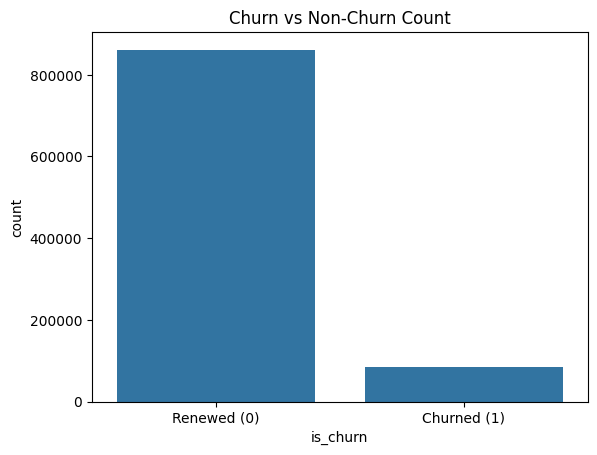

Churn rate: 8.99%


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn count
sns.countplot(x='is_churn', data=train_df)
plt.title("Churn vs Non-Churn Count")
plt.xticks([0,1], ['Renewed (0)', 'Churned (1)'])
plt.show()

# Churn ratio
churn_rate = train_df['is_churn'].mean()
print(f"Churn rate: {churn_rate:.2%}")


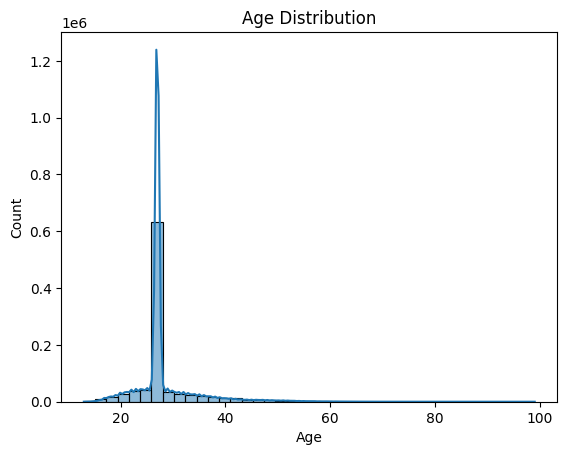

In [24]:
sns.histplot(train_df['bd'], bins=40, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


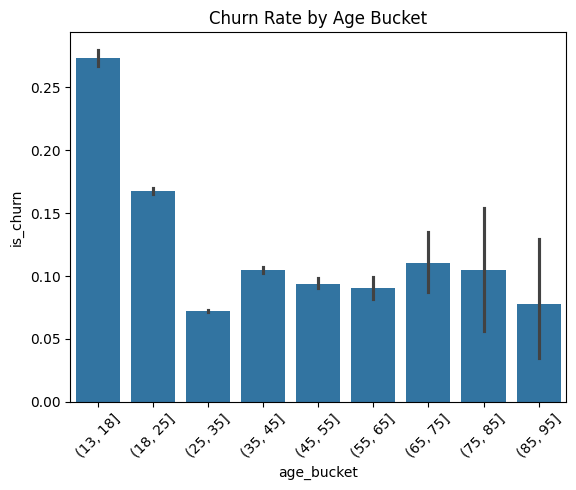

In [25]:
train_df['age_bucket'] = pd.cut(train_df['bd'], bins=[13, 18, 25, 35, 45, 55, 65, 75, 85, 95])
sns.barplot(x='age_bucket', y='is_churn', data=train_df)
plt.title("Churn Rate by Age Bucket")
plt.xticks(rotation=45)
plt.show()


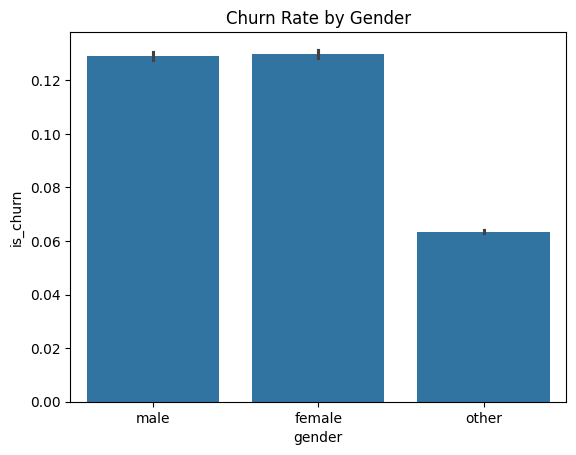

In [26]:
sns.barplot(data=train_df, x='gender', y='is_churn')
plt.title("Churn Rate by Gender")
plt.show()


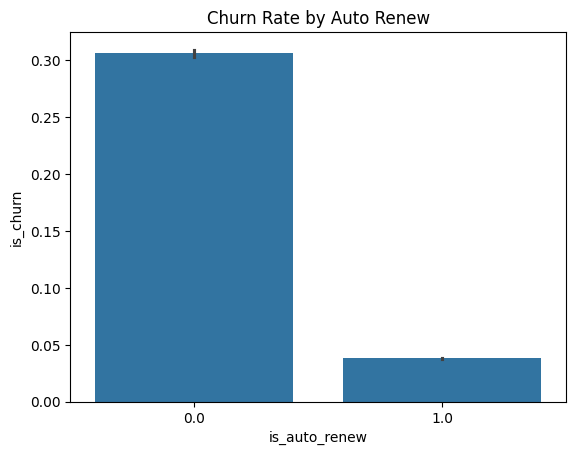

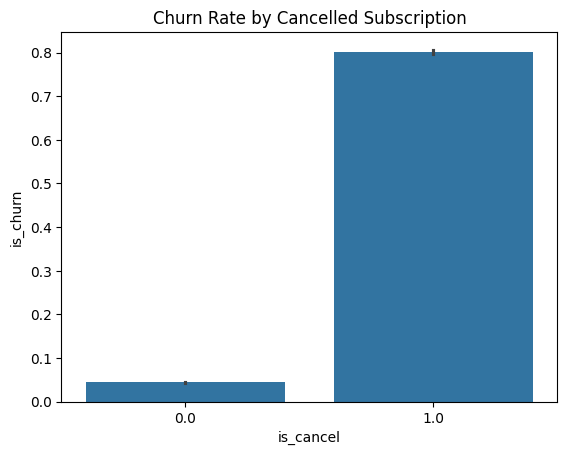

In [27]:
plt.figure()
sns.barplot(x='is_auto_renew', y='is_churn', data=train_df)
plt.title("Churn Rate by Auto Renew")
plt.show()

plt.figure()
sns.barplot(x='is_cancel', y='is_churn', data=train_df)
plt.title("Churn Rate by Cancelled Subscription")
plt.show()


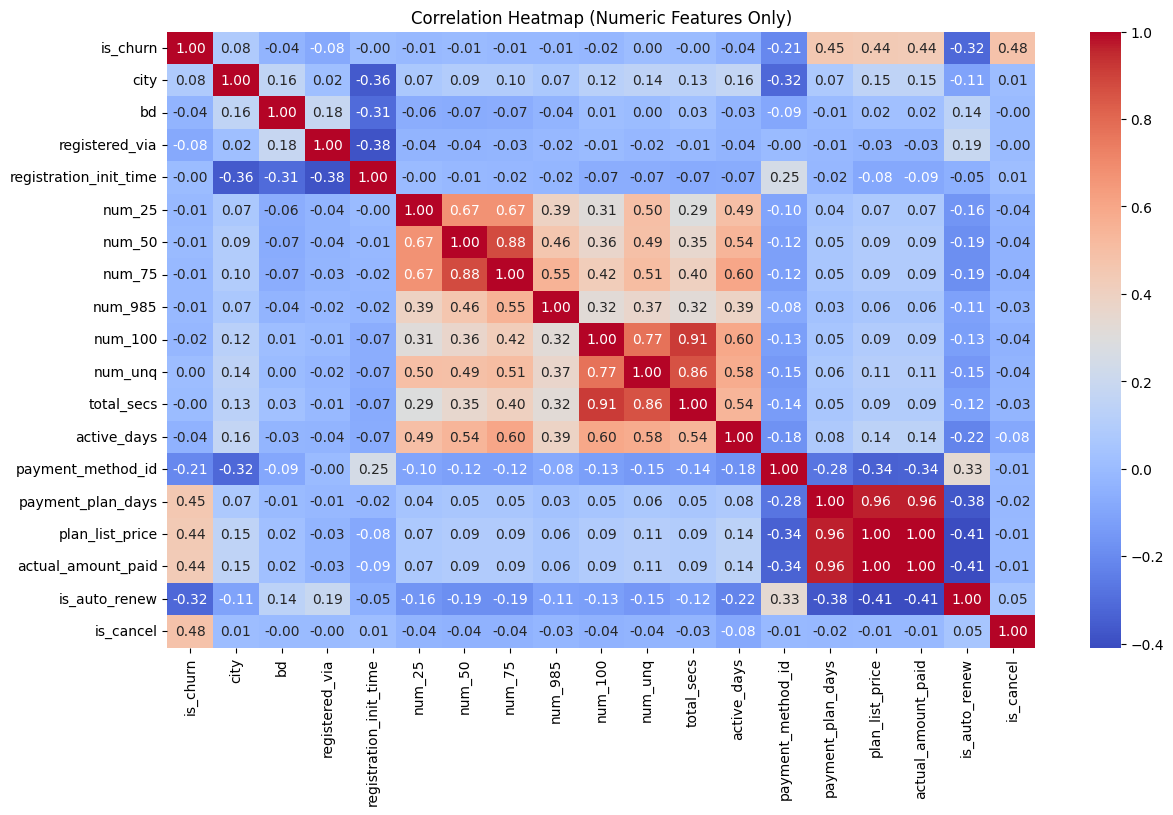

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = train_df.select_dtypes(include=['number'])

# Compute and plot the correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


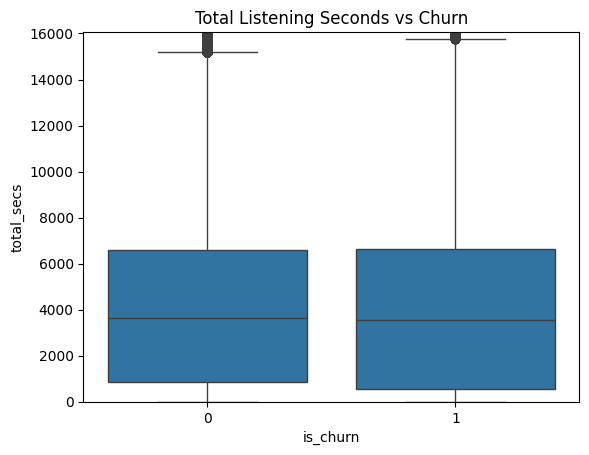

In [29]:
sns.boxplot(x='is_churn', y='total_secs', data=train_df)
plt.title("Total Listening Seconds vs Churn")
plt.ylim(0, train_df['total_secs'].quantile(0.95))  # Limit to 95th percentile to avoid outliers
plt.show()


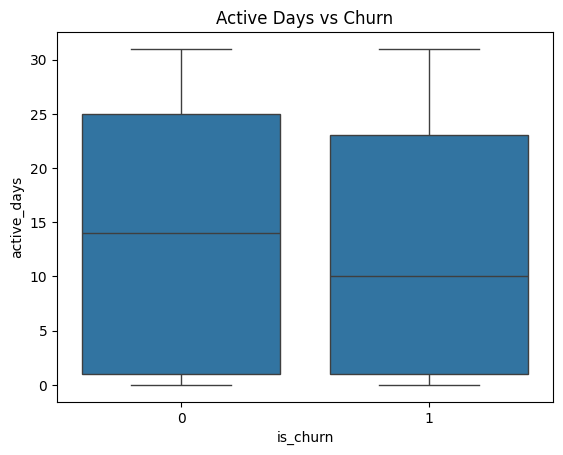

In [30]:
sns.boxplot(x='is_churn', y='active_days', data=train_df)
plt.title("Active Days vs Churn")
plt.show()


# Add this Graph in the Dashboard

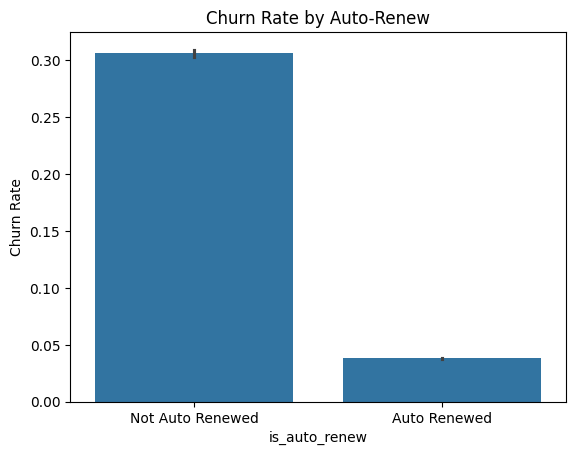

In [31]:
# Churn rate by auto-renew
sns.barplot(x='is_auto_renew', y='is_churn', data=train_df)
plt.title("Churn Rate by Auto-Renew")
plt.xticks([0, 1], ['Not Auto Renewed', 'Auto Renewed'])
plt.ylabel("Churn Rate")
plt.show()


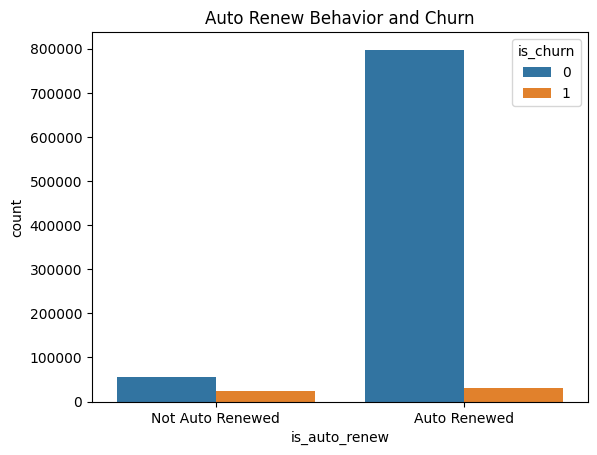

In [32]:
# Count of auto-renew status
sns.countplot(x='is_auto_renew', hue='is_churn', data=train_df)
plt.title("Auto Renew Behavior and Churn")
plt.xticks([0, 1], ['Not Auto Renewed', 'Auto Renewed'])
plt.show()


# Add this Graph in the Dashboard

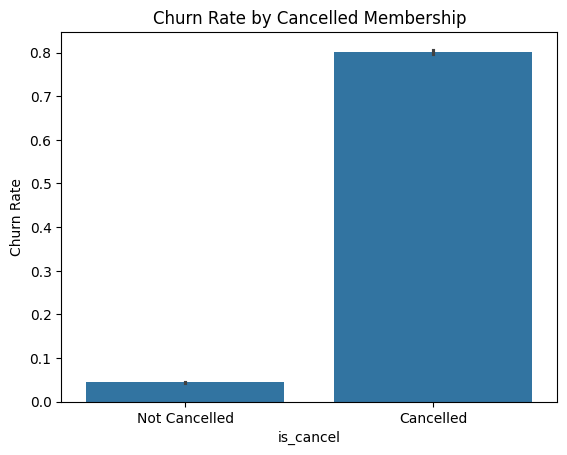

In [33]:
# Churn rate by cancel status
sns.barplot(x='is_cancel', y='is_churn', data=train_df)
plt.title("Churn Rate by Cancelled Membership")
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.ylabel("Churn Rate")
plt.show()

# Add this Graph in the Dashboard

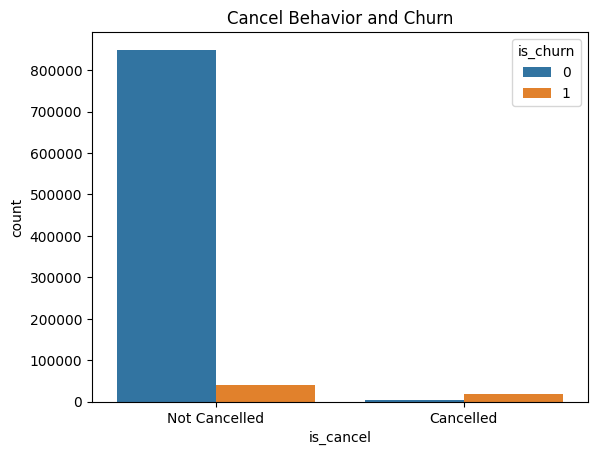

In [34]:
# Count of cancel status with churn overlay
sns.countplot(x='is_cancel', hue='is_churn', data=train_df)
plt.title("Cancel Behavior and Churn")
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.show()

In [35]:

train_df['has_transaction'] = train_df['payment_method_id'].notna().astype(int)


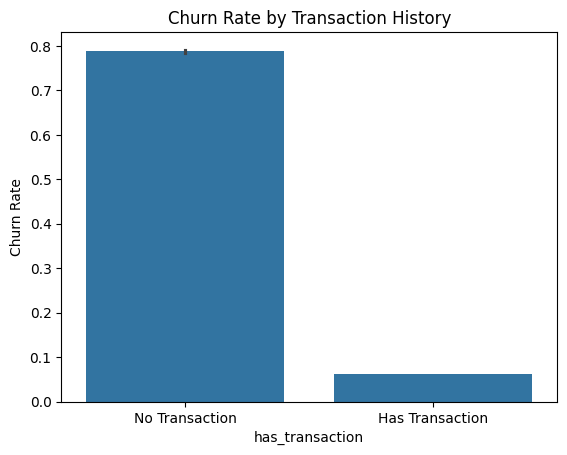

In [36]:
sns.barplot(x='has_transaction', y='is_churn', data=train_df)
plt.xticks([0,1], ['No Transaction', 'Has Transaction'])
plt.title('Churn Rate by Transaction History')
plt.ylabel('Churn Rate')
plt.show()

In [37]:
train_df['no_txn_and_churn'] = ((train_df['has_transaction'] == 0) & (train_df['is_churn'] == 1)).astype(int)


In [38]:
print(train_df['no_txn_and_churn'].value_counts())


no_txn_and_churn
0    918000
1     28686
Name: count, dtype: int64


In [39]:
no_txn_churn_rate = train_df['no_txn_and_churn'].mean() * 100
print(f"Percentage of users who churned and never paid: {no_txn_churn_rate:.2f}%")


Percentage of users who churned and never paid: 3.03%


C:\Users\HP\AppData\Local\Temp\ipykernel_13944\379536250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_method_id', y='is_churn', data=payment_method_churn, palette='viridis')


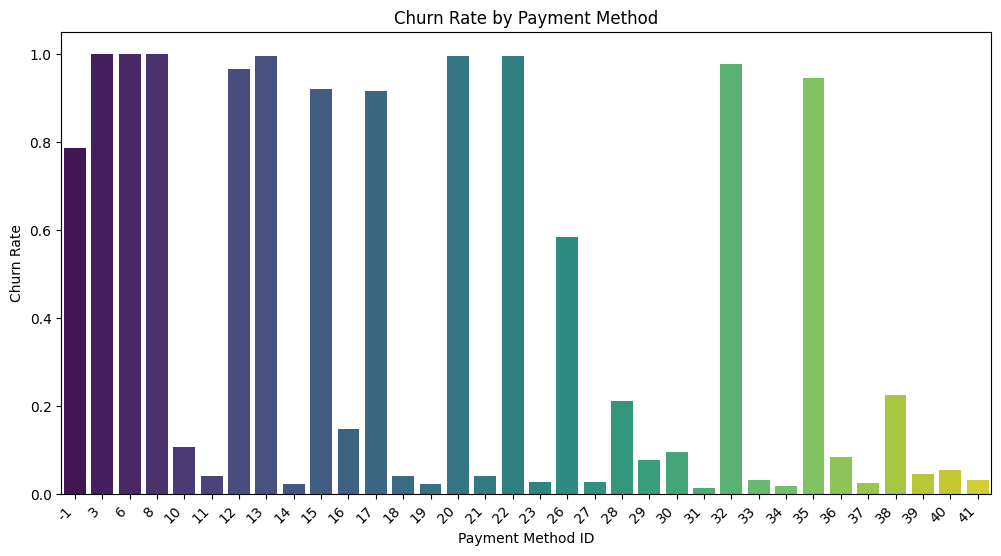

In [40]:

# Fill missing payment_method_id with -1 and convert to int
train_df['payment_method_id'] = train_df['payment_method_id'].fillna(-1).astype(int)

# Calculate churn rate for each payment method
payment_method_churn = train_df.groupby('payment_method_id')['is_churn'].mean().reset_index()
payment_method_churn = payment_method_churn.sort_values(by='payment_method_id', ascending=True)

# Plot churn rate for each payment method
plt.figure(figsize=(12, 6))
sns.barplot(x='payment_method_id', y='is_churn', data=payment_method_churn, palette='viridis')

plt.xlabel('Payment Method ID')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45, ha='right')  # Rotated x-axis labels for readability
plt.show()


In [41]:
# Song completion rate (how many songs were fully listened to)
import numpy as np
train_df['song_completion_rate'] = train_df['num_100'] / (
    train_df['num_25'] + train_df['num_50'] + train_df['num_75'] + train_df['num_985'] + train_df['num_100']
)
train_df['song_completion_rate'] = train_df['song_completion_rate'].replace([np.inf, -np.inf], 0).fillna(0)


In [42]:
# Average seconds per unique song
train_df['avg_secs_per_song'] = train_df['total_secs'] / train_df['num_unq']
train_df['avg_secs_per_song'] = train_df['avg_secs_per_song'].replace([np.inf, -np.inf], 0).fillna(0)

In [43]:
# High engagement flag (top 50% by total listening time)
train_df['high_engagement'] = (train_df['total_secs'] > train_df['total_secs'].median()).astype(int)

In [44]:
# Membership duration in days
train_df['membership_days'] = (
    pd.to_datetime(train_df['membership_expire_date']) - pd.to_datetime(train_df['transaction_date'])
).dt.days.fillna(0)


In [45]:
# Discount rate = % of discount the user got
train_df['discount_rate'] = 1 - (train_df['actual_amount_paid'] / train_df['plan_list_price'])
train_df['discount_rate'] = train_df['discount_rate'].replace([np.inf, -np.inf], 0).fillna(0)


In [46]:
# Trial user flag (paid 0)
train_df['is_trial'] = (train_df['actual_amount_paid'] == 0).astype(int)


In [47]:
# Auto-renew + cancel behavior
train_df['auto_renew_but_cancel'] = ((train_df['is_auto_renew'] == 1) & (train_df['is_cancel'] == 1)).astype(int)


In [48]:
# Age group buckets
train_df['age_group'] = pd.cut(train_df['bd'], bins=[10, 20, 30, 40, 50, 60, 100], labels=False, right=False)

# Account age in days (as of March 1, 2017)
train_df['registration_init_time'] = pd.to_datetime(train_df['registration_init_time'], format='%Y%m%d', errors='coerce')
train_df['account_age_days'] = (
    pd.to_datetime("2017-03-01") - train_df['registration_init_time']
).dt.days.fillna(0)

In [49]:

# Has the user ever made a payment?
train_df['has_transaction'] = train_df['payment_method_id'].notna().astype(int)

# Churned without ever paying (for segmentation or exploration)
train_df['no_txn_and_churn'] = ((train_df['has_transaction'] == 0) & (train_df['is_churn'] == 1)).astype(int)

In [50]:
# Bucket payment method risk (based on churn patterns you observed)
train_df['payment_method_risk'] = train_df['payment_method_id'].map({
    18: 'low_risk', 11: 'low_risk', 31: 'low_risk',
    3: 'high_risk', 6: 'high_risk', 13: 'high_risk', 22: 'high_risk',
    -1: 'no_txn'
})
train_df['payment_method_risk'] = train_df['payment_method_risk'].fillna('medium_risk')


# Start running fro here till the end

In [51]:
# Fill and encode categorical variables
train_df['gender'] = train_df['gender'].fillna('other')
train_df['registered_via'] = train_df['registered_via'].fillna(-1).astype(int)
train_df['payment_method_id'] = train_df['payment_method_id'].fillna(-1).astype(int)
train_df['city'] = train_df['city'].fillna(-1).astype(int)

In [52]:
# Select target
y = train_df['is_churn']

# Drop columns that should not be used as features
exclude_cols = ['msno', 'is_churn', 'registration_init_time', 'transaction_date', 'membership_expire_date']

# Include all numeric and engineered features
X = train_df.drop(columns=exclude_cols)


In [53]:
X_encoded = pd.get_dummies(X, drop_first=True) 


In [54]:
# Clean column names to be Python-safe (remove special characters)
X_encoded.columns = (
    X_encoded.columns
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.replace("[", "", regex=False)
    .str.replace("]", "", regex=False)
    .str.replace(", ", "_", regex=False)
    .str.replace(" ", "_", regex=False)
)


In [55]:
# STEP 3: Train/Test Split (80% train, 20% validation)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [56]:
# Assuming you already split your data like this:
# X_train, X_val, y_train, y_val = train_test_split(...)

# Save the validation features
X_val.to_csv("D:/DEPI Graduation Project/X_val.csv", index=False)

# Optionally also save the matching labels if needed
y_val.to_csv("D:/DEPI Graduation Project/y_val.csv", index=False)


In [57]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    max_depth=5,
    class_weight={0: 1.0, 1: 5.0}  # or 10.0 depending on imbalance
)
tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 1.0, 1: 5.0}, max_depth=5)

In [58]:
from sklearn.metrics import roc_auc_score

# Predict churn probability on validation set
y_val_proba_tree = tree.predict_proba(X_val)[:, 1]

# Calculate AUC
roc_auc_tree = roc_auc_score(y_val, y_val_proba_tree)
print("Validation AUC for Decision Tree:", roc_auc_tree)


Validation AUC for Decision Tree: 0.9682735720414651


In [59]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score

y_pred_tree = tree.predict(X_val)

with mlflow.start_run(run_name="Decision Tree"):
    mlflow.log_param("model", "DecisionTree")
    mlflow.log_params(tree.get_params())
    mlflow.log_metric("accuracy", accuracy_score(y_val, y_pred_tree))
    mlflow.log_metric("roc_auc", roc_auc_tree)
    mlflow.sklearn.log_model(tree, "model")


2025/04/26 00:30:42 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/04/26 00:30:57 WARNING mlflow.models.model: Model logged without a signature and input example. Ple

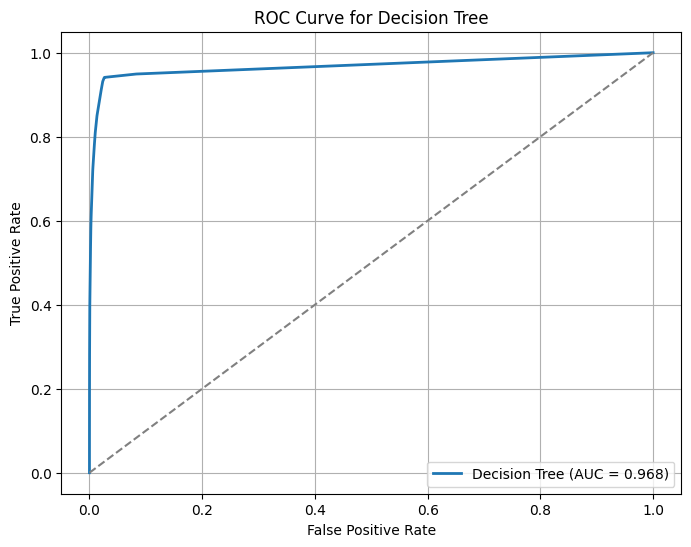

In [60]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba_tree)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc_tree:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], '--', color='gray')  # Diagonal = random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [61]:
from sklearn.metrics import roc_auc_score, classification_report
1
y_pred_tree = tree.predict(X_val)
y_prob_tree = tree.predict_proba(X_val)[:, 1]

In [62]:
print("Decision Tree AUC:", roc_auc_score(y_val, y_prob_tree))
print("Decision Tree Classification Report:")
print(classification_report(y_val, y_pred_tree))

Decision Tree AUC: 0.9682735720414651
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    172309
           1       0.78      0.94      0.85     17029

    accuracy                           0.97    189338
   macro avg       0.89      0.96      0.92    189338
weighted avg       0.97      0.97      0.97    189338



In [63]:
# STEP 3: Train/Test Split (80% train, 20% validation)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [64]:
X_encoded = X_encoded.fillna(0)


In [65]:
train_df['has_transaction'] = train_df['payment_method_id'].notna().astype(int)


In [66]:
X_encoded[['payment_plan_days', 'plan_list_price', 'actual_amount_paid']] = \
    X_encoded[['payment_plan_days', 'plan_list_price', 'actual_amount_paid']].fillna(0)

X_encoded[['is_auto_renew', 'is_cancel']] = \
    X_encoded[['is_auto_renew', 'is_cancel']].fillna(0).astype(int)


In [67]:
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)


In [68]:
from sklearn.linear_model import LogisticRegression

# Custom weights: give higher importance to class 1 (churners)
logreg = LogisticRegression(
    max_iter=1000,
    class_weight={0: 1.0, 1: 7.0}  # adjust the 5.0 based on your imbalance
)

logreg.fit(X_train, y_train)


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1.0, 1: 7.0}, max_iter=1000)

In [69]:
from sklearn.metrics import roc_auc_score

# Predict probabilities on validation set
y_val_proba = logreg.predict_proba(X_val)[:, 1]

# Calculate AUC
roc_auc = roc_auc_score(y_val, y_val_proba)
print("Validation AUC:", roc_auc)


Validation AUC: 0.8823065401414177


In [70]:
from sklearn.metrics import accuracy_score

y_pred_log = logreg.predict(X_val)  


In [71]:
with mlflow.start_run():
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_params(logreg.get_params())
    mlflow.log_metric("accuracy", accuracy_score(y_val, y_pred_log))
    mlflow.sklearn.log_model(logreg, "model")


2025/04/26 00:34:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


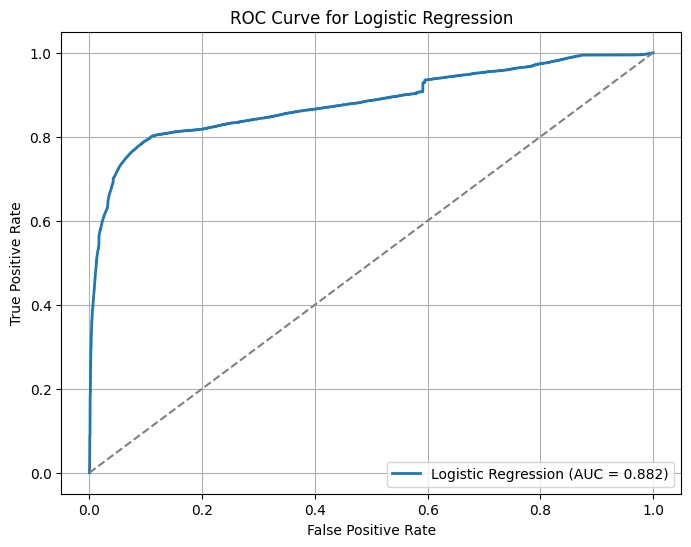

In [72]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get FPR, TPR for various thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], '--', color='gray')  # Diagonal line = random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [73]:
# Evaluate Logistic Regression
from sklearn.metrics import roc_auc_score, classification_report

y_pred_log = logreg.predict(X_val)
y_prob_log = logreg.predict_proba(X_val)[:, 1]

print("Logistic Regression AUC:", roc_auc_score(y_val, y_prob_log))
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_log))

Logistic Regression AUC: 0.8823065401414177
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    172309
           1       0.62      0.69      0.65     17029

    accuracy                           0.93    189338
   macro avg       0.80      0.82      0.81    189338
weighted avg       0.94      0.93      0.94    189338



In [120]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight= {0: 5.0, 1: 1.0},  # You can try 2.0, 5.0, 10.0 based on imbalance
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 5.0, 1: 1.0}, max_depth=10,
                       random_state=42)

In [121]:
from sklearn.metrics import roc_auc_score

# Predict churn probabilities
y_val_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# Calculate AUC
roc_auc_rf = roc_auc_score(y_val, y_val_proba_rf)
print("Validation AUC for Random Forest:", roc_auc_rf)


Validation AUC for Random Forest: 0.9845453808970843


In [122]:
from sklearn.metrics import accuracy_score

y_pred_rf = rf_model.predict(X_val)


In [123]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score
with mlflow.start_run(run_name="Random Forest"):
    mlflow.log_param("model", "RandomForest")
    mlflow.log_params(rf_model.get_params())
    mlflow.log_metric("accuracy", accuracy_score(y_val, y_pred_rf))
    mlflow.sklearn.log_model(rf_model, "model")


2025/04/26 01:14:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


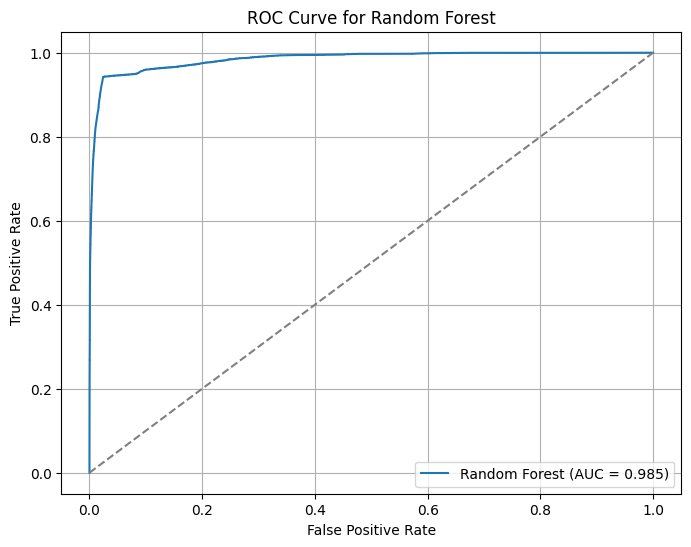

In [124]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [125]:
# Evaluate Random Forest
from sklearn.metrics import roc_auc_score, classification_report

# Predict class labels
y_pred_rf = rf_model.predict(X_val)

# Predict churn probabilities (probability of class 1)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]

# AUC score
print("Random Forest AUC:", roc_auc_score(y_val, y_prob_rf))

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))


Random Forest AUC: 0.9845453808970843
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172309
           1       0.97      0.55      0.70     17029

    accuracy                           0.96    189338
   macro avg       0.96      0.77      0.84    189338
weighted avg       0.96      0.96      0.95    189338



In [126]:
import joblib
joblib.dump(rf_model, "D:/DEPI Graduation Project/random_forest_churn.pkl")


['D:/DEPI Graduation Project/random_forest_churn.pkl']

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt


In [82]:
# Step 1: Handle missing values
X_train_nb = X_train.fillna(0)
X_val_nb = X_val.fillna(0)

In [83]:
# Step 2: Compute sample weights based on class imbalance
sample_weights = compute_sample_weight(class_weight={0: 1.0, 1: 5.0}, y=y_train)

In [84]:
# Step 3: Train weighted Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train, sample_weight=sample_weights)

GaussianNB()

In [85]:
# Step 4: Predict
y_val_proba_nb = nb_model.predict_proba(X_val_nb)[:, 1]
y_pred_nb = nb_model.predict(X_val_nb)

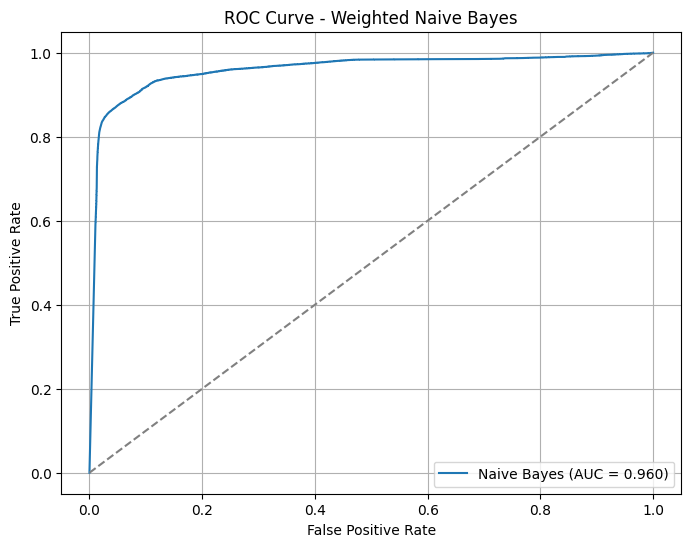

In [86]:
# Step 6: Plot ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_val, y_val_proba_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_score(y_val, y_val_proba_nb):.3f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Weighted Naive Bayes")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [87]:
# Step 5: Evaluate
print("Naive Bayes AUC:", roc_auc_score(y_val, y_val_proba_nb))
print("Naive Bayes Classification Report:")
print(classification_report(y_val, y_pred_nb))


Naive Bayes AUC: 0.9600061034132191
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    172309
           1       0.82      0.81      0.82     17029

    accuracy                           0.97    189338
   macro avg       0.90      0.90      0.90    189338
weighted avg       0.97      0.97      0.97    189338



In [88]:
import joblib
joblib.dump(rf_model, "D:/DEPI Graduation Project/random_forest_churn.pkl")


['D:/DEPI Graduation Project/random_forest_churn.pkl']

In [89]:
kaggle_test = pd.read_csv('D:/DEPI Graduation Project/customer-retention-datathon-riyadh-edition(2)/kaggle_test_data.csv')  # Contains only 'msno'



In [90]:
kaggle_test = kaggle_test.merge(members, on='msno', how='left')


In [91]:
user_logs_agg = user_logs.groupby('msno').agg({
    'num_25': 'sum',
    'num_50': 'sum',
    'num_75': 'sum',
    'num_985': 'sum',
    'num_100': 'sum',
    'num_unq': 'mean',
    'total_secs': 'sum',
    'date': lambda x: x.nunique()
}).reset_index().rename(columns={'date': 'active_days'})

kaggle_test = kaggle_test.merge(user_logs_agg, on='msno', how='left')


In [92]:
transactions_sorted = transactions.sort_values(by=['msno', 'transaction_date'], ascending=[True, False])
latest_txn = transactions_sorted.drop_duplicates('msno', keep='first')

kaggle_test = kaggle_test.merge(latest_txn, on='msno', how='left')


In [105]:
# Fill missing logs with 0
log_cols = ['num_25','num_50','num_75','num_985','num_100','num_unq','total_secs','active_days']
kaggle_test[log_cols] = kaggle_test[log_cols].fillna(0)

# Age cleanup
valid_bd = kaggle_test[(kaggle_test['bd'] >= 13) & (kaggle_test['bd'] <= 99)]['bd']
median_bd = valid_bd.median()
kaggle_test['bd'] = kaggle_test['bd'].apply(lambda x: median_bd if pd.isna(x) or x < 13 or x > 99 else x)

# Gender
kaggle_test['gender'] = kaggle_test['gender'].fillna('other')

# Song completion rate
kaggle_test['song_completion_rate'] = kaggle_test['num_100'] / (
    kaggle_test['num_25'] + kaggle_test['num_50'] + kaggle_test['num_75'] + kaggle_test['num_985'] + kaggle_test['num_100']
)
kaggle_test['song_completion_rate'] = kaggle_test['song_completion_rate'].replace([np.inf, -np.inf], 0).fillna(0)

# Avg seconds per song
kaggle_test['avg_secs_per_song'] = kaggle_test['total_secs'] / kaggle_test['num_unq']
kaggle_test['avg_secs_per_song'] = kaggle_test['avg_secs_per_song'].replace([np.inf, -np.inf], 0).fillna(0)

# High engagement flag
kaggle_test['high_engagement'] = (kaggle_test['total_secs'] > train_df['total_secs'].median()).astype(int)

# Membership duration
kaggle_test['membership_days'] = (
    pd.to_datetime(kaggle_test['membership_expire_date']) - pd.to_datetime(kaggle_test['transaction_date'])
).dt.days.fillna(0)

# Discount
kaggle_test['discount_rate'] = 1 - (kaggle_test['actual_amount_paid'] / kaggle_test['plan_list_price'])
kaggle_test['discount_rate'] = kaggle_test['discount_rate'].replace([np.inf, -np.inf], 0).fillna(0)

# Trial user
kaggle_test['is_trial'] = (kaggle_test['actual_amount_paid'] == 0).astype(int)

# Auto-renew + cancel
kaggle_test['auto_renew_but_cancel'] = ((kaggle_test['is_auto_renew'] == 1) & (kaggle_test['is_cancel'] == 1)).astype(int)

# Age group
kaggle_test['age_group'] = pd.cut(kaggle_test['bd'], bins=[10, 20, 30, 40, 50, 60, 100], labels=False, right=False)

# Account age
kaggle_test['registration_init_time'] = pd.to_datetime(kaggle_test['registration_init_time'], format='%Y%m%d', errors='coerce')
kaggle_test['account_age_days'] = (
    pd.to_datetime("2017-04-01") - kaggle_test['registration_init_time']
).dt.days.fillna(0)

# Has transaction
kaggle_test['has_transaction'] = kaggle_test['payment_method_id'].notna().astype(int)

# Payment method risk (use same mapping)
kaggle_test['payment_method_risk'] = kaggle_test['payment_method_id'].map({
    18: 'low_risk', 11: 'low_risk', 31: 'low_risk',
    3: 'high_risk', 6: 'high_risk', 13: 'high_risk', 22: 'high_risk',
    -1: 'no_txn'
})
kaggle_test['payment_method_risk'] = kaggle_test['payment_method_risk'].fillna('medium_risk')

# Fill remaining categorical cols
kaggle_test['registered_via'] = kaggle_test['registered_via'].fillna(-1).astype(int)
kaggle_test['payment_method_id'] = kaggle_test['payment_method_id'].fillna(-1).astype(int)
kaggle_test['city'] = kaggle_test['city'].fillna(-1).astype(int)


In [106]:
# Clean column names to be Python-safe (remove special characters)
X_encoded.columns = (
    X_encoded.columns
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.replace("[", "", regex=False)
    .str.replace("]", "", regex=False)
    .str.replace(", ", "_", regex=False)
    .str.replace(" ", "_", regex=False)
)


In [107]:
kaggle_test_encoded = pd.get_dummies(
    kaggle_test,
    columns=['gender', 'payment_method_risk'],
    drop_first=True
)


In [108]:
 # Make sure the encoded test set has all columns that were in training
missing_cols = [col for col in X_train.columns if col not in kaggle_test_encoded.columns]
for col in missing_cols:
    kaggle_test_encoded[col] = 0  # Add missing columns with 0

# Reorder columns to match training
kaggle_test_encoded = kaggle_test_encoded[X_train.columns]


In [109]:
# Predict churn probability using your trained model
kaggle_test['is_churn'] = rf_model.predict_proba(kaggle_test_encoded)[:, 1]


In [110]:
submission = kaggle_test[['msno', 'is_churn']]
submission.to_csv('D:/DEPI Graduation Project/submission_Random_Forest.csv', index=False)
print("✅ Submission file saved as submission_Random_Forest.csv")


✅ Submission file saved as submission_Random_Forest.csv


In [111]:
print(submission.head())
print(submission['is_churn'].describe())


                                           msno  is_churn
0  p/cTvgmqHIvfnxri24mvmtWR/8tYHkAMQ8Ag+Wfr80Y=  0.115670
1  QWFKKLbhAlZweGREt1w/4bf8+f8ji/g9tHvT067gBfM=  0.020882
2  5MeUEsjudcrBVTAulJ6C8HD9wJrT4jKFn2iUPlYFLZQ=  0.061548
3  R1XugIkI0ED1uiTRUWCzN/5NGaM8or/EKr5mAphw5rM=  0.023067
4  lmiwRo3TsWwy4D3mOwgf1ZIU339wXDm74m0MTUJETJk=  0.021990
count    24274.000000
mean         0.135727
std          0.212495
min          0.013408
25%          0.031168
50%          0.063806
75%          0.107458
max          0.999448
Name: is_churn, dtype: float64


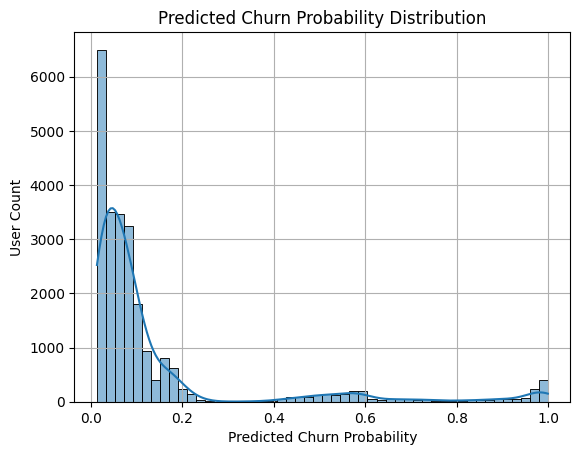

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(kaggle_test['is_churn'], bins=50, kde=True)
plt.title("Predicted Churn Probability Distribution")
plt.xlabel("Predicted Churn Probability")
plt.ylabel("User Count")
plt.grid(True)
plt.show()


In [113]:
# Count how many users were predicted as likely to churn

likely_churners = (kaggle_test['is_churn'] >= 0.5).sum()
likely_non_churners = (kaggle_test['is_churn'] < 0.5).sum()

print(f"Predicted churners (prob ≥ 0.5): {likely_churners}")
print(f"Predicted non-churners (prob < 0.5): {likely_non_churners}")


Predicted churners (prob ≥ 0.5): 2169
Predicted non-churners (prob < 0.5): 22105


In [114]:
# Total number of users in the test set
total_users = len(kaggle_test)

# Define your thresholds
thresholds = [0.5, 0.7, 0.9]

# Calculate and print percentage for each threshold
for threshold in thresholds:
    count = (kaggle_test['is_churn'] >= threshold).sum()
    percentage = (count / total_users) * 100
    print(f"Users with churn probability ≥ {threshold}: {count} users ({percentage:.2f}%)")


Users with churn probability ≥ 0.5: 2169 users (8.94%)
Users with churn probability ≥ 0.7: 1105 users (4.55%)
Users with churn probability ≥ 0.9: 786 users (3.24%)


In [115]:
# Total users in the test set
total_users = len(kaggle_test)

# Users predicted to churn (using threshold 0.5)
churn_count = (kaggle_test['is_churn'] >= 0.5).sum()

# Percentage of churners
churn_percentage = (churn_count / total_users) * 100

print(f"Total predicted churners: {churn_count} out of {total_users}")
print(f"Predicted churn percentage: {churn_percentage:.2f}%")


Total predicted churners: 2169 out of 24274
Predicted churn percentage: 8.94%
